## libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [2]:

df=pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
print(f'The information about the dataset:\n{df.info()}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
print(f'The description of dataset:\n{df.describe(include="all").T}')

The description of dataset:
           count          mean           std         min           25%  \
Time    284807.0  9.481386e+04  47488.145955    0.000000  54201.500000   
V1      284807.0  1.168375e-15      1.958696  -56.407510     -0.920373   
V2      284807.0  3.416908e-16      1.651309  -72.715728     -0.598550   
V3      284807.0 -1.379537e-15      1.516255  -48.325589     -0.890365   
V4      284807.0  2.074095e-15      1.415869   -5.683171     -0.848640   
V5      284807.0  9.604066e-16      1.380247 -113.743307     -0.691597   
V6      284807.0  1.487313e-15      1.332271  -26.160506     -0.768296   
V7      284807.0 -5.556467e-16      1.237094  -43.557242     -0.554076   
V8      284807.0  1.213481e-16      1.194353  -73.216718     -0.208630   
V9      284807.0 -2.406331e-15      1.098632  -13.434066     -0.643098   
V10     284807.0  2.239053e-15      1.088850  -24.588262     -0.535426   
V11     284807.0  1.673327e-15      1.020713   -4.797473     -0.762494   
V12     28

In [6]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [7]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [8]:
df.drop(columns='Class',axis=1).duplicated().sum()

1081

In [9]:
df.shape

(284807, 31)

In [10]:
df['Class'].value_counts() #imbalance

0    284315
1       492
Name: Class, dtype: int64

In [11]:
scaler=StandardScaler()
scaled_time = scaler.fit_transform(df['Time'].values.reshape(-1, 1))
scaled_amount = scaler.fit_transform(df['Amount'].values.reshape(-1, 1))

scaled_df = pd.DataFrame({
    'Scaled_Time': scaled_time.flatten(),
    'Scaled_Amount': scaled_amount.flatten()
})

print(scaled_df.head())

   Scaled_Time  Scaled_Amount
0    -1.996583       0.244964
1    -1.996583      -0.342475
2    -1.996562       1.160686
3    -1.996562       0.140534
4    -1.996541      -0.073403


## EDA ##

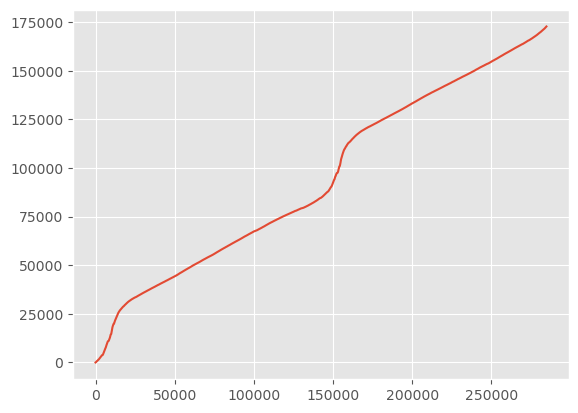

In [12]:
df['Time'].plot()
plt.show()

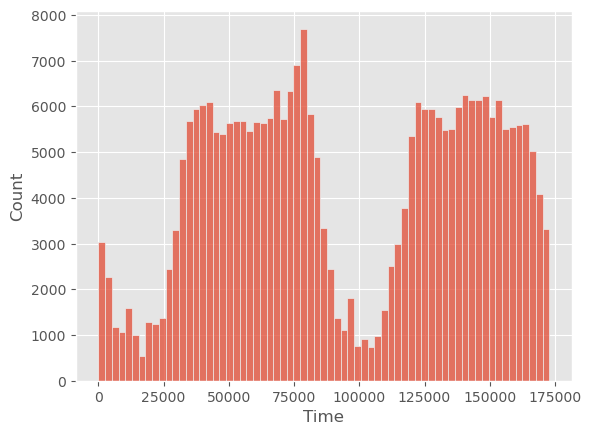

In [13]:
ax = sns.histplot(data=df, x='Time')  
plt.show()

<Axes: title={'center': 'Correlation with Class '}>

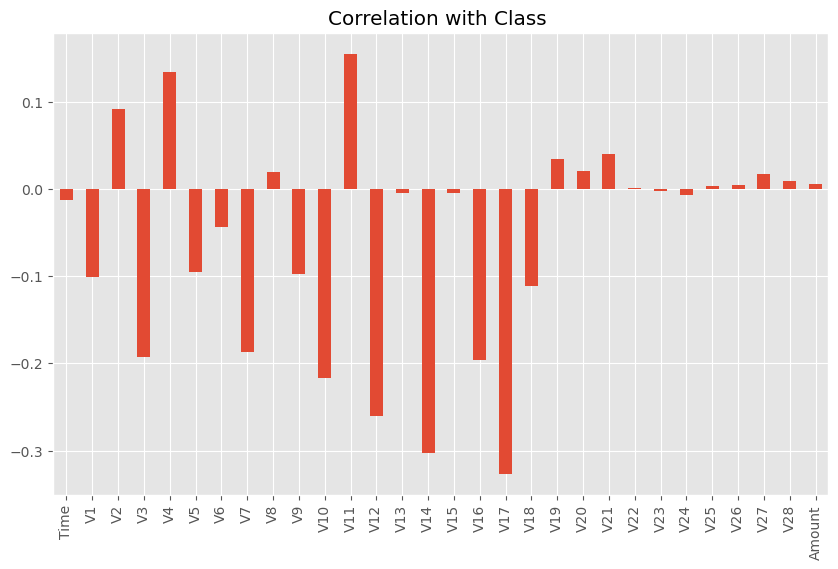

In [14]:
df.drop('Class',axis=1).corrwith(df.Class).plot(kind='bar',grid=True,figsize=(10,6),title="Correlation with Class ")

In [16]:
x=df.drop(columns='Class',axis=1)
y=df['Class']

In [18]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=45)
print(f"the shape of x_train is : {x_train.shape}")
print(f'the shape of x_test is : {x_test.shape}')
print(f'the shape of y_tain is : {y_train.shape}')
print(f'the shape of y_test is {y_test.shape}')

the shape of x_train is : (688, 30)
the shape of x_test is : (296, 30)
the shape of y_tain is : (688,)
the shape of y_test is (296,)


In [19]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)

print(f'classification report :{classification_report(y_test,y_pred)}')
print('*************************************')
print(f'confusion matrix :{confusion_matrix(y_test,y_pred)}')
print('*************************************')
print(f'accuracy score :{accuracy_score(y_test,y_pred)}')

classification report :              precision    recall  f1-score   support

           0       0.91      1.00      0.95       143
           1       1.00      0.91      0.95       153

    accuracy                           0.95       296
   macro avg       0.96      0.95      0.95       296
weighted avg       0.96      0.95      0.95       296

*************************************
confusion matrix :[[143   0]
 [ 14 139]]
*************************************
accuracy score :0.9527027027027027


In [21]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred2=lr.predict(x_test)


print(f'classification report :{classification_report(y_test,y_pred2)}')
print('*************************************')
print(f'confusion matrix :{confusion_matrix(y_test,y_pred2)}')
print('*************************************')
print(f'accuracy score :{accuracy_score(y_test,y_pred2)}')

classification report :              precision    recall  f1-score   support

           0       0.91      0.97      0.94       143
           1       0.97      0.91      0.94       153

    accuracy                           0.94       296
   macro avg       0.94      0.94      0.94       296
weighted avg       0.94      0.94      0.94       296

*************************************
confusion matrix :[[139   4]
 [ 14 139]]
*************************************
accuracy score :0.9391891891891891
